<h1><center>Telco Customer Churn</center></h1>
<center>A fictional telecom company offering home phone and internet services</center>

## **Project Overview**

#### Project goal
The most important variable for us is *churn*. We concentrate on it and examine what has the most impact that customer stay or leave. 

The dataset is perfectly created for prediction, since we have labels and we could use one of the supervised methods which is logistic regression: we have 0/1 (No/Yes) response variable, however in this project I would love to focus more on finding the relationships inside the data, finding insights and patterns hidden in the data. 

**The main objective is to explore the factors influencing customer churn and to identify distinct customer segments.** By understanding these segments, the company can make informed recommendations on contract types, retention strategies, and other personalized services to reduce churn and enhance customer satisfaction.

In this document, we will undertake a thorough data preparation process to ensure the dataset is complete and ready for analysis. This includes addressing any missing values, verifying correct data types, and ensuring accurate labels, encoding, and scaling. Additionally, we will apply Principal Component Analysis (PCA) for dimensionality reduction, which will help streamline our data by reducing its complexity while preserving key variance.

In the subsequent section, we will shift our focus to clustering. We will evaluate three different algorithms—K-means, hierarchical clustering, and DBSCAN—and visualize the resulting clusters using t-SNE plots. Our goal is to identify the most effective clustering model and provide targeted strategies for each customer segment.

#### Scope of work
1. <u>Data understanding & preparation:</u> 
    - data cleaning: 
        * row granularity
        * data types verification
        * feature selection - removing redundant columns 
        * handling missing values
        * converting categorical to numerical
        * scaling features (standardization)
    - EDA: 
        * correlation
        * feature importance from a basic logistic regression model
        * overall churn rate
        * plots 
    - Dimensionality reduction: 
        * PCA for feature engineering 
***
2. <u>Clustering:</u>
    - Algorithms: 
        * K-Means - evaluation based on inertia and silhouette score 
        * Hierarchial clustering
        * DBSCAN
        * t-SNE for visualizing clusters 
    - Recommendations:
        * cluster analyze to suggest targeted retention strategies 

#### Dataset details
- Churn:  whether a customer left within the last month
- Service subscriptions: phone, multiple lines, online security, online backup, device protection, tech support, and streaming services (TV and movies), internet (Fiber optic provides faster, more reliable internet and is better for handling lots of data, while DSL is slower and can be affected by distance but uses existing phone lines)
- Account details: contract type, payment method, paperless billing status, monthly charges, and total charges, tenure (length of time a customer has been with the company; typically measured in months)
- Demographics: Gender, whether the customer has a partner or dependents (children, spouse, elderly parents)

dataset source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

### Table of contents
* [1. Data preparation - with explanation](#chapter1)
* [2. Data preparation - essential steps](#chapter2)
* [3. EDA](#chapter3)
* [4. Dimensionality reduction - PCA](#chapter4)
* [5. Save datasets](#chapter5)

## **Modules**

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.decomposition import PCA 

## **1. Data prep** <a id="chapter1"></a>

In [11]:
data_raw = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
#7043 rows, 21 columns 
data_raw.shape                                            

(7043, 21)

### **a) row granularity**

In [14]:
# each customer appears just once, there is no duplicates
data_raw['customerID'].nunique()

7043

In [15]:
# create a copy and work on it, in case we could come back anytime to our original data
data_telco = data_raw.copy() 

### **b) drop ID column**

In [17]:
# drop ID because it is not informative
data_telco.drop(columns = ['customerID'], inplace = True)

In [18]:
data_telco

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### **c) column names**

In [20]:
# I want to maintain consistency and ensure that all feature names start with an uppercase letter
data_telco.columns  = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn']

### **d) data types & missing values**

In [22]:
#a quick look at data types and NaNs
data_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


#### 1. NaNs

In [24]:
# missing values
data_telco.isnull().sum() 
# dataset is complete, no missing values at least at first sight, 
# it may happen that there will be missing value in the guise of empty string ' ' !

Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### 2. Data types

In [26]:
#data types
print(data_telco.dtypes[data_telco.dtypes != object],"\n\n")
print(data_telco.dtypes[data_telco.dtypes == object])

SeniorCitizen       int64
Tenure              int64
MonthlyCharges    float64
dtype: object 


Gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
TotalCharges        object
Churn               object
dtype: object


#### + check the responses for any typos and ensure they are accurate

In [28]:
for feature in data_telco:
    print()
    print(data_telco[feature].value_counts()) 
    print()
    print('---------')


Gender
Male      3555
Female    3488
Name: count, dtype: int64

---------

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

---------

Partner
No     3641
Yes    3402
Name: count, dtype: int64

---------

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

---------

Tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

---------

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

---------

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

---------

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

---------

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

---------

OnlineBackup
No                     3088
Yes                    2429
No internet service 

In [29]:
# real categorical: Gender, SeniorCitizen, Partner, Dependents, PhoneService,MultipleLines, InternetService,OnlineSecurity,
# OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Churn

# real numerical: Tenure, MonthlyCharges,TotalCharges

# some types are inappropriate (total charges is numerical, SeniorCitizen is categorical) 
# + to proceed we need to change categorical data to numerical 

In [30]:
# Insights: 
# If a customer has 'No internet/phone service', they cannot use other services, making it logically similar to 'No'
# Apart from that we have separate columns that convey the information whether or not customer has phone/internet service
# With other features we are just interested if the customer has them or not 
# So that, I would convert No internet/phone service to just No answer -> It simplifies the feature set and makes it more intuitive

# First I didnt notice that sth is wrong, I just created correlation matrix and there I saw that features related to 'No internet service' are perfectly correlated 
# This means if a customer has 'No internet service', they are likely to have 'No internet service' across other related features
# For example, a customer who does not use internet services likely will not have online security, backup, tech support, or streaming services
 
#However, I am still thinking about MultipleLines because the answers mean:
# No phone service - customer doesn't have even one line
# No - customer has just one line 
# Yes - customer has multiple lines

####  3. TotalCharges - change it to numerical

In [32]:
# Correct data types
# data_telco['TotalCharges'] = data_telco['TotalCharges'].astype(float) 
# The code above give me ValueError: could not convert string to float: ' ', what means that somewhere are empty strings(NaNs)
# The reason TotalCharges is showing as type object instead of float or int is likely because the column contains empty strings 
# Let's investigate it

In [33]:
data_telco[data_telco['TotalCharges'] == ' ']

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [34]:
# There are indeed 11 empty strings -> Is it only one columns like this? 
data_telco[data_telco['TotalCharges'] == ' '].shape[0]

11

In [35]:
data_telco['TotalCharges'] = data_telco['TotalCharges'].replace(' ', np.nan)

In [36]:
# Code above worked out 
data_telco.isnull().sum()

Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [37]:
# What to do with missing values? 
# Options that I consider: 
# - remove 11 rows
# - impute with the mean or median

# Distribution and Outliers:
#     Mean: Sensitive to outliers. If your data contains extreme values, the mean might be skewed, which could affect the imputation.
#     Median: Robust to outliers. If your data has significant outliers, the median provides a better central tendency measure.

# Distribution Characteristics:
#     Skewed Distribution: If the data is heavily skewed, the median is often a better choice because it represents the middle value and is less influenced by extreme values.
#     Symmetrical Distribution: If the data distribution is relatively symmetrical, the mean might be acceptable.

# To sum up
# - if there are outliers and skewed distribution -> better median
# - if there are not many outliers and symmetrical distribution -> can be mean 

In [38]:
# The data is right-skewed, as evidenced by the mean being significantly higher than the median ( 2283 vs 1397). 
# This indicates that there are some extremely high charges that are pulling the mean upwards.
# In such case, imputing missing values with the median would likely be a better choice because it is less affected by extreme values.

# 50% of clients has total charges lower or equal to 1397.475000
# Standard deviation is close to the mean
# The range is quite broad, from a min around 19 and maxiumum of around 8684 
data_telco['TotalCharges'].dropna().astype(float).describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

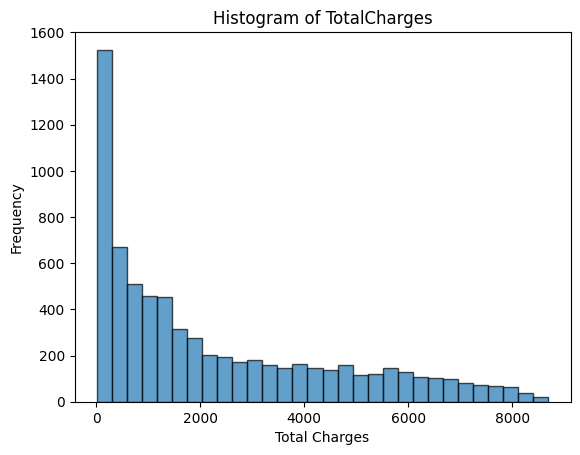

In [39]:
# Quick histogram to visualize distribution 
#plt.figure(figsize=(10, 6))
plt.hist(data_telco['TotalCharges'].dropna().astype(float), bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of TotalCharges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

In [40]:
median_TotalCharges = data_telco['TotalCharges'].dropna().astype(float).median()
data_telco['TotalCharges'] = data_telco['TotalCharges'].fillna(median_TotalCharges)

In [41]:
data_telco['TotalCharges'] = data_telco['TotalCharges'].astype(float)

In [42]:
# The median is the same, the mean slightly decreased, instead of 2283.300441 we have 2281.916928
data_telco['TotalCharges'].describe()

count    7043.000000
mean     2281.916928
std      2265.270398
min        18.800000
25%       402.225000
50%      1397.475000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

#### 4. Change in categories (No internet/phone service -> No) + Convert categorical to numerical 

In [44]:
# The most popular approach for converting categorial features to numerical are label encoding and one-hot encoding

#Short review
# Label encoding for:
    # - ordinal features, with natural order/ranking like low -> medium -> high 
    # - tree-based models, algorithms like decision trees, random forests, and gradient boosting can handle label-encoded
    # categorical features without assuming any ordinal relationship
    # - low cardinality - features with a small number of unique categories where one-hot encoding might lead to a large number of columns

# One-hot encoding for: 
    # - nominal features, where the categories do not have a natual order
    # - linear models and neural networks
    # - features with high cardinality - if there are many unique values 

In [45]:
# Categorical data 

# Label encoding
# female/male 
# 0/1 - SeniorCitizen - already encoded 
# No/Yes - Partner, Dependents, PhoneService, PaperlessBilling, Churn
# No/Yes/No phone service - MultipleLines, 
# No/Yes/No internet service - OnlineSecurity,OnlineBackup, DeviceProtection,TechSupport,StreamingTV,StreamingMovies

# One-hot encoding
# Fiber optic/DSL/No - InternetService
# Month-to-month/One year/Two year - Contract
# Electronic check/Mailed check/Bank transfer (automatic)/Credit card (automatic) - PaymentMethod

### **Label encoding**

In [47]:
# Label encoding for binary categorical variables -> assigns an unique integer to each category 
data_encoded = data_telco.copy()
data_encoded['Gender'] = data_telco['Gender'].map({'Female':1, 'Male':0})
data_encoded['Partner'] = data_telco['Partner'].map({'Yes':1, 'No':0})
data_encoded['Dependents'] = data_telco['Dependents'].map({'Yes':1, 'No':0})
data_encoded['PhoneService'] = data_telco['PhoneService'].map({'Yes':1, 'No':0})
data_encoded['PaperlessBilling'] = data_telco['PaperlessBilling'].map({'Yes':1, 'No':0})
data_encoded['Churn'] = data_telco['Churn'].map({'Yes':1, 'No':0})

# No/Yes/No phone service - MultipleLines, 
# No/Yes/No internet service - OnlineSecurity,OnlineBackup, DeviceProtection,TechSupport,StreamingTV,StreamingMovies
# Yes = 1, else = 0
data_encoded['MultipleLines'] = np.where(data_telco['MultipleLines'] == 'Yes',1,0)
data_encoded['OnlineSecurity'] = np.where(data_telco['OnlineSecurity'] == 'Yes',1,0)
data_encoded['OnlineBackup'] = np.where(data_telco['OnlineBackup'] == 'Yes',1,0)
data_encoded['DeviceProtection'] = np.where(data_telco['DeviceProtection'] == 'Yes',1,0)
data_encoded['TechSupport'] = np.where(data_telco['TechSupport'] == 'Yes',1,0)
data_encoded['StreamingTV'] = np.where(data_telco['StreamingTV'] == 'Yes',1,0)
data_encoded['StreamingMovies'] = np.where(data_telco['StreamingMovies'] == 'Yes',1,0)

data_encoded

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,1,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,1,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,0,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


### **One-hot encoding**

In [49]:
# One-hot encoding -> creates dummies - binary columns for each category
data_encoded_all = pd.get_dummies(data_encoded, columns=[
     'InternetService','Contract', 'PaymentMethod'
])

data_encoded_all
# It returns a new DataFrame that includes both the original columns that were not one-hot encoded and the new dummy variables

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,True,False,False,False,True,False,False,False,False,True
7039,1,0,1,1,72,1,1,0,1,1,...,False,True,False,False,True,False,False,True,False,False
7040,1,0,1,1,11,0,0,1,0,0,...,True,False,False,True,False,False,False,False,True,False
7041,0,1,1,0,4,1,1,0,0,0,...,False,True,False,True,False,False,False,False,False,True


In [50]:
# 7043 rows and 27 columns -> at the beginning were 21 columns -> 6 columns were added
data_encoded_all.shape

(7043, 27)

In [51]:
data_encoded_all.dtypes # all columns are numerical 

Gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
Tenure                                       int64
PhoneService                                 int64
MultipleLines                                int32
OnlineSecurity                               int32
OnlineBackup                                 int32
DeviceProtection                             int32
TechSupport                                  int32
StreamingTV                                  int32
StreamingMovies                              int32
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

### **e) scaling features**
#### Standardization - transforms all columns to have mean ~ 0 and std. dev ~ 1 
Set all variables on a similar scale - to ensure all features contribute equally to the model preventing biases toward variables with larger scales and magnitudes

In [53]:
std_scaler = StandardScaler()
standardized = std_scaler.fit_transform(data_encoded_all)
data_standardized = pd.DataFrame(standardized, columns = data_encoded_all.columns)

In [54]:
data_standardized

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,-0.854176,-0.633933,1.378241,-0.723968,...,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807
1,-0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.854176,1.577454,-0.725563,1.381277,...,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,-0.711026,1.835513
2,-0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,1.577454,1.378241,-0.723968,...,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513
3,-0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,-0.854176,1.577454,-0.725563,1.381277,...,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,1.887201,-0.525047,-0.711026,-0.544807
4,1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,-0.633933,-0.725563,-0.723968,...,-0.723740,1.129102,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.170719,1.577454,-0.725563,1.381277,...,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,-0.711026,1.835513
7039,1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.170719,-0.633933,1.378241,1.381277,...,-0.723740,1.129102,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,1.904590,-0.711026,-0.544807
7040,1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,-0.854176,1.577454,-0.725563,-0.723968,...,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807
7041,-0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.170719,-0.633933,-0.725563,-0.723968,...,-0.723740,1.129102,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513


In [55]:
# To check if standardization was performed well, so mean should be around 0 and st.dev around 1 -> it'is correct
data_standardized.describe()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,...,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03,7.043000e+03
mean,2.219500e-17,-4.842546e-17,7.162933e-17,1.069396e-16,-2.421273e-17,7.869137e-17,-1.281257e-16,-2.534770e-17,5.561361e-17,3.379694e-17,...,-6.759387e-17,-2.471716e-17,1.437631e-17,-9.584206e-18,-4.136341e-17,-4.439000e-17,-1.715068e-17,-1.003819e-16,3.556245e-17,2.219500e-17
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,...,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00
min,-9.905318e-01,-4.399165e-01,-9.666223e-01,-6.540119e-01,-1.318165e+00,-3.054010e+00,-8.541762e-01,-6.339330e-01,-7.255627e-01,-7.239675e-01,...,-7.237397e-01,-8.856598e-01,-5.259274e-01,-1.105970e+00,-5.142494e-01,-5.629751e-01,-5.298852e-01,-5.250473e-01,-7.110260e-01,-5.448069e-01
25%,-9.905318e-01,-4.399165e-01,-9.666223e-01,-6.540119e-01,-9.516817e-01,3.274383e-01,-8.541762e-01,-6.339330e-01,-7.255627e-01,-7.239675e-01,...,-7.237397e-01,-8.856598e-01,-5.259274e-01,-1.105970e+00,-5.142494e-01,-5.629751e-01,-5.298852e-01,-5.250473e-01,-7.110260e-01,-5.448069e-01
50%,-9.905318e-01,-4.399165e-01,-9.666223e-01,-6.540119e-01,-1.372744e-01,3.274383e-01,-8.541762e-01,-6.339330e-01,-7.255627e-01,-7.239675e-01,...,-7.237397e-01,-8.856598e-01,-5.259274e-01,9.041838e-01,-5.142494e-01,-5.629751e-01,-5.298852e-01,-5.250473e-01,-7.110260e-01,-5.448069e-01
75%,1.009559e+00,-4.399165e-01,1.034530e+00,1.529024e+00,9.214551e-01,3.274383e-01,1.170719e+00,1.577454e+00,1.378241e+00,1.381277e+00,...,1.381712e+00,1.129102e+00,-5.259274e-01,9.041838e-01,-5.142494e-01,-5.629751e-01,-5.298852e-01,-5.250473e-01,1.406418e+00,-5.448069e-01
max,1.009559e+00,2.273159e+00,1.034530e+00,1.529024e+00,1.613701e+00,3.274383e-01,1.170719e+00,1.577454e+00,1.378241e+00,1.381277e+00,...,1.381712e+00,1.129102e+00,1.901403e+00,9.041838e-01,1.944582e+00,1.776278e+00,1.887201e+00,1.904590e+00,1.406418e+00,1.835513e+00


## **2. Data prep - essential steps in one block of code** <a id="chapter2"></a>

This section consists  of main steps used for data cleaning. It summarizes the actions from the previous section without going into details.

In [58]:
data_raw = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data_telco = data_raw.copy() 
data_telco.drop(columns = ['customerID'], inplace = True)

data_telco.columns  = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn']

data_telco['TotalCharges'] = data_telco['TotalCharges'].replace(' ', np.nan)
median_TotalCharges = data_telco['TotalCharges'].dropna().astype(float).median()
data_telco['TotalCharges'] = data_telco['TotalCharges'].fillna(median_TotalCharges)
data_telco['TotalCharges'] = data_telco['TotalCharges'].astype(float)

# Label encoding for binary categorical variables -> assigns an unique integer to each category 
data_encoded = data_telco.copy()
data_encoded['Gender'] = data_telco['Gender'].map({'Female':1, 'Male':0})
data_encoded['Partner'] = data_telco['Partner'].map({'Yes':1, 'No':0})
data_encoded['Dependents'] = data_telco['Dependents'].map({'Yes':1, 'No':0})
data_encoded['PhoneService'] = data_telco['PhoneService'].map({'Yes':1, 'No':0})
data_encoded['PaperlessBilling'] = data_telco['PaperlessBilling'].map({'Yes':1, 'No':0})
data_encoded['Churn'] = data_telco['Churn'].map({'Yes':1, 'No':0})

# No/Yes/No phone service - MultipleLines, 
# No/Yes/No internet service - OnlineSecurity,OnlineBackup, DeviceProtection,TechSupport,StreamingTV,StreamingMovies
# Yes = 1, else = 0
data_encoded['MultipleLines'] = np.where(data_telco['MultipleLines'] == 'Yes',1,0)
data_encoded['OnlineSecurity'] = np.where(data_telco['OnlineSecurity'] == 'Yes',1,0)
data_encoded['OnlineBackup'] = np.where(data_telco['OnlineBackup'] == 'Yes',1,0)
data_encoded['DeviceProtection'] = np.where(data_telco['DeviceProtection'] == 'Yes',1,0)
data_encoded['TechSupport'] = np.where(data_telco['TechSupport'] == 'Yes',1,0)
data_encoded['StreamingTV'] = np.where(data_telco['StreamingTV'] == 'Yes',1,0)
data_encoded['StreamingMovies'] = np.where(data_telco['StreamingMovies'] == 'Yes',1,0)


data_encoded_all = pd.get_dummies(data_encoded, columns=[
     'InternetService','Contract', 'PaymentMethod'
])


std_scaler = StandardScaler()
standardized = std_scaler.fit_transform(data_encoded_all)
data_standardized = pd.DataFrame(standardized, columns = data_encoded_all.columns)

## **3. EDA** <a id="chapter3"></a>

### **a) correlation matrix**

In [61]:
correlation_matrix = data_standardized.corr()
#correlation_matrix

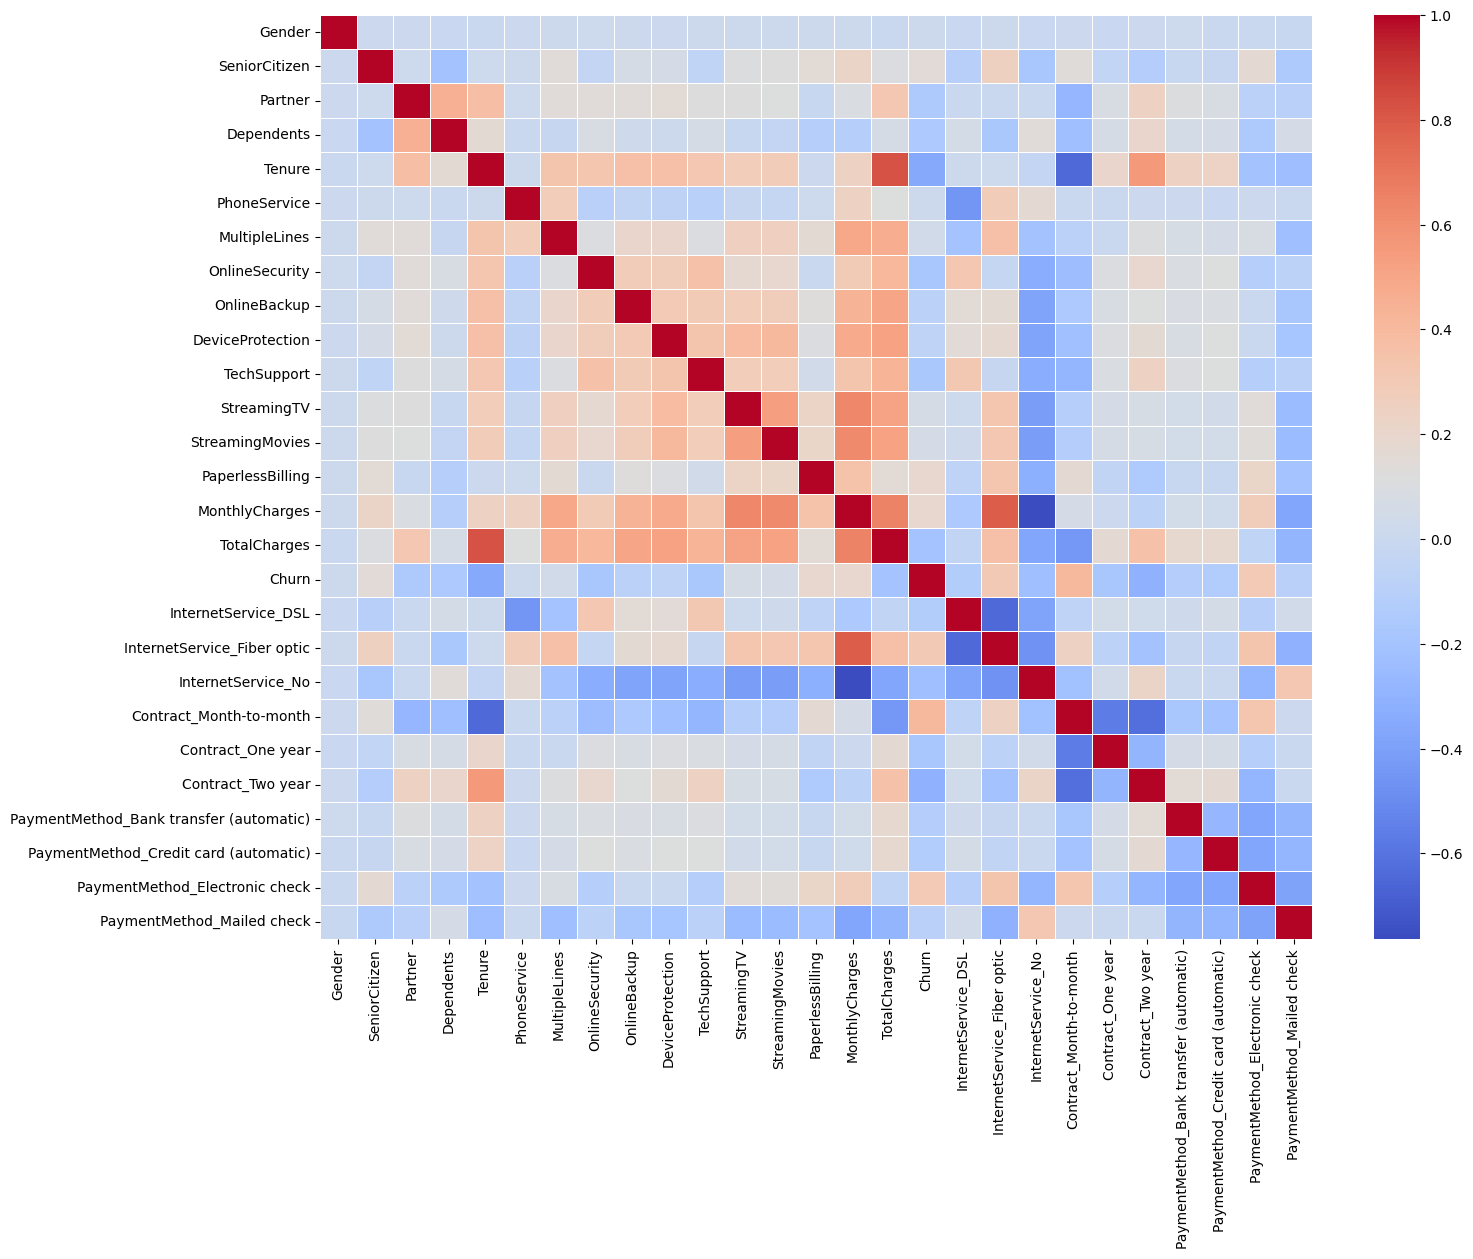

In [62]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5);

In [63]:
def highlight_high_corr(val):
    color = '#c92a2a' if (abs(val) > 0.7 and val != 1.0)  else ''
    return f'background-color: {color}'

# correlation_matrix.style.applymap(highlight_high_corr) -> Styler.applymap has been deprecated. Use Styler.map instead.
# subset=pd.IndexSlice[:, :] - that the styling should be applied to all rows and columns
correlation_matrix.style.map(highlight_high_corr, subset=pd.IndexSlice[:, :])

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
Gender,1.000000,0.001874,0.001808,-0.010517,-0.005106,0.006488,0.008414,0.017021,0.013773,0.002105,0.009212,0.008393,0.010487,0.011754,0.014569,0.000002,0.008612,-0.006568,0.011286,-0.006026,0.003386,-0.008026,0.003695,0.016024,-0.001215,-0.000752,-0.013744
SeniorCitizen,0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,0.156530,0.220173,0.102652,0.150889,-0.108322,0.255338,-0.182742,0.138360,-0.046262,-0.117000,-0.016159,-0.024135,0.171718,-0.153477
Partner,0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,-0.014877,0.096848,0.318364,-0.150448,-0.000851,0.000304,0.000615,-0.280865,0.082783,0.248091,0.110706,0.082029,-0.083852,-0.095125
Dependents,-0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,-0.111377,-0.113890,0.063593,-0.164221,0.052010,-0.165818,0.139812,-0.231720,0.068368,0.204613,0.052021,0.060267,-0.150642,0.059071
Tenure,-0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.006152,0.247900,0.825464,-0.352229,0.013274,0.019720,-0.039062,-0.645561,0.202570,0.558533,0.243510,0.233006,-0.208363,-0.233852
PhoneService,0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.016505,0.247398,0.113013,0.011942,-0.452425,0.289999,0.172209,-0.000742,-0.002791,0.003519,0.007556,-0.007721,0.003062,-0.003319
MultipleLines,0.008414,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.163530,0.490434,0.468705,0.040102,-0.199920,0.366083,-0.210564,-0.088203,-0.003794,0.106253,0.075527,0.060048,0.083618,-0.227206
OnlineSecurity,0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,-0.003636,0.296594,0.412091,-0.171226,0.321269,-0.030696,-0.333403,-0.246679,0.100162,0.191773,0.095158,0.115721,-0.112338,-0.080798
OnlineBackup,0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.126735,0.441780,0.509607,-0.082255,0.157884,0.165651,-0.381593,-0.164172,0.083722,0.111400,0.087004,0.090785,-0.000408,-0.174164
DeviceProtection,0.002105,0.059428,0.153786,0.013963,0.360653,-0.071227,0.201137,0.275438,0.303546,1.000000,0.333313,0.390874,0.402111,0.103797,0.482692,0.522374,-0.066160,0.146291,0.176049,-0.380754,-0.225662,0.102495,0.165096,0.083115,0.111554,-0.003351,-0.187373


In [64]:
def corr_dataframe(corr_matrix, threshold=0.7):
    # Initialize lists to store the variable pairs and their correlation values
    var1_list = []
    var2_list = []
    corr_value_list = []

    # Iterate over the upper triangle of the matrix to avoid duplicate pairs
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                var1 = corr_matrix.columns[i]
                var2 = corr_matrix.columns[j]
                corr_value = corr_matrix.iloc[i, j]

                # Append the values to the lists
                var1_list.append(var1)
                var2_list.append(var2)
                corr_value_list.append(corr_value)

    # Create a DataFrame from the lists
    corr_df = pd.DataFrame({
        'Var1': var1_list,
        'Var2': var2_list,
        'Correlation': corr_value_list
    })

    return corr_df

In [65]:
corr_dataframe(correlation_matrix, threshold=0.6).sort_values(by='Correlation', key=lambda x: abs(x), ascending=False)

,Var1,Var2,Correlation
0,Tenure,TotalCharges,0.825464
5,MonthlyCharges,InternetService_Fiber optic,0.787066
6,MonthlyCharges,InternetService_No,-0.763557
4,MonthlyCharges,TotalCharges,0.650864
1,Tenure,Contract_Month-to-month,-0.645561
7,InternetService_DSL,InternetService_Fiber optic,-0.640987
2,StreamingTV,MonthlyCharges,0.629603
3,StreamingMovies,MonthlyCharges,0.627429
8,Contract_Month-to-month,Contract_Two year,-0.622633


In [66]:
# Positive correlation: 
# customers with a longer tenure tend to have higher total charges -> this suggests that customers who stay longer are likely to accumulate higher charges over time 
# higher monthly charges are associated with having a fiber optic internet service -> this likely reflects that fiber optic plans are more expensive
# higher monthly charges are associated with higher total charges -> this relationship is expected, as higher monthly fees contribute to higher total charges over the tenure
# customers who pay more monthly charges are more likely to have streaming services (tv/movies) -> naturally if you pay more, you have an access to more things

# Negative correlation: 
# customers who pay more likely have internet services, while those without internet service have lower monthly charges
# a longer tenure are less likely to have a month-to-month contract -> this is intuitive as longer-tenured customers are often on longer-term contracts
# if you have dsl, you don't have fiber optic; if you have month to month contract, you don't have two years one and vice versa
# customers who have one type are unlikely to have the other, customers choose typically one internet type/contract but not both 

### **b) feature importance from logistic regression**

In [68]:
X = data_standardized.drop(['Churn'],axis =1 )
y = data_encoded['Churn'] #have to be categorical, so Yes or No in this case


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Get feature names
feature_names = X.columns

# Get coefficients from the trained model
coefficients = model.coef_[0]

# Create a DataFrame to hold feature names and their corresponding coefficients
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance)

                                    Feature  Coefficient
15                             TotalCharges     0.619422
17              InternetService_Fiber optic     0.526299
19                  Contract_Month-to-month     0.319163
12                          StreamingMovies     0.229374
6                             MultipleLines     0.160781
13                         PaperlessBilling     0.151360
11                              StreamingTV     0.121334
24           PaymentMethod_Electronic check     0.120334
1                             SeniorCitizen     0.075078
9                          DeviceProtection     0.038223
0                                    Gender     0.036529
20                        Contract_One year     0.009231
2                                   Partner     0.004203
22  PaymentMethod_Bank transfer (automatic)    -0.029612
25               PaymentMethod_Mailed check    -0.048671
3                                Dependents    -0.052815
8                              

In [69]:
# Feature Selection: 
# Features with large coefficients (positive or negative) are important predictors and should be considered carefully in the model. 
# Features with small coefficients might have less impact on the prediction

# Important features: Tenure,TotalCharges, MonthlyCharges, InternetService_No, InternetService_Fiber optic, Contract_Two year, Contract month to month 
# To sum up: tenure, charges, type of internet service, type of contract 

In [70]:
# just for curiosity 
# we want to focus on customers who leave, so churn = 1, our model need to predict well 1, rather than 0 
y_pred = model.predict(X_test) 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.68      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.80      0.81      0.81      2113



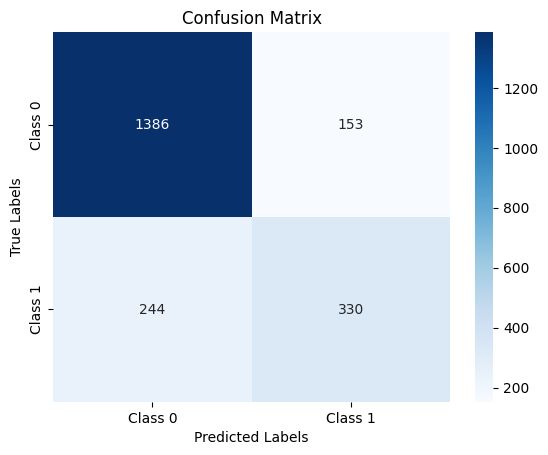

In [71]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#As we notice from the matrix, model is good in predicting 0 rather than 1, unfortunately. We want the contrary effect. What we
#could do is to decrease a threshold, so to make that 1 will not be from 0.5 but from 0.2 for example. To adjust model for our prediction.

### **c) remove monthly and total charges - they can be described by tenure and other features**

In [73]:
# Which variable to remove? -> The one that have a high absolute correlation with others 
# monthly charges, total charges - seems to be highly correlated with multiple variables

# When deciding which variable to remove between Var1 and Var2, given that Var1 has higher correlations with other variables than Var2
# Removing highly correlated variables can help reduce multicollinearity, which can improve model performance and interpretability.

In [74]:
data_after_corr = data_standardized.copy()
data_after_corr

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,-0.854176,-0.633933,1.378241,-0.723968,...,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807
1,-0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.854176,1.577454,-0.725563,1.381277,...,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,-0.711026,1.835513
2,-0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,1.577454,1.378241,-0.723968,...,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513
3,-0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,-0.854176,1.577454,-0.725563,1.381277,...,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,1.887201,-0.525047,-0.711026,-0.544807
4,1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,-0.633933,-0.725563,-0.723968,...,-0.723740,1.129102,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.170719,1.577454,-0.725563,1.381277,...,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,-0.711026,1.835513
7039,1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.170719,-0.633933,1.378241,1.381277,...,-0.723740,1.129102,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,1.904590,-0.711026,-0.544807
7040,1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,-0.854176,1.577454,-0.725563,-0.723968,...,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807
7041,-0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.170719,-0.633933,-0.725563,-0.723968,...,-0.723740,1.129102,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513


In [75]:
data_after_corr.drop(['MonthlyCharges','TotalCharges'], axis=1, inplace=True)

In [76]:
correlation_matrix_2 = data_after_corr.corr()

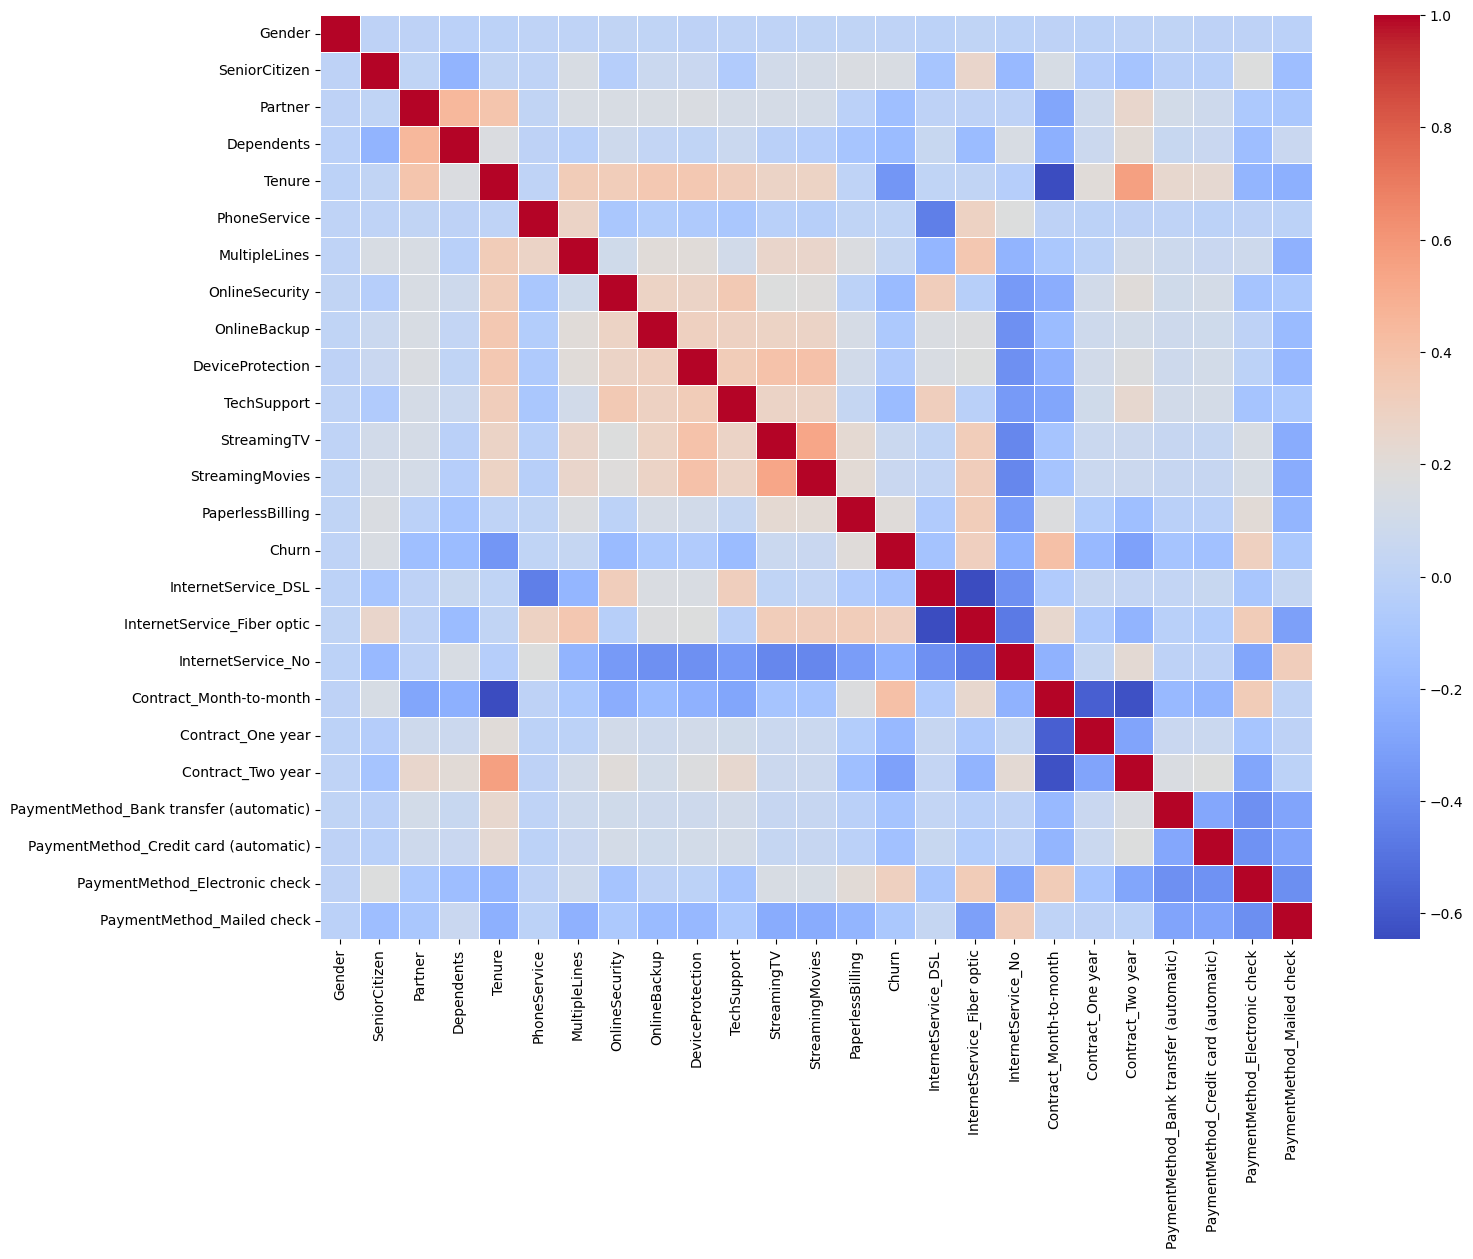

In [77]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix_2, annot=False, cmap='coolwarm', linewidths=0.5);

In [78]:
# for now i will keep other variables, the most problematic were removed 

### **d) churn and other variables**

#### 1. Correlation churn vs other features

In [81]:
# I'm using the dataset without removed columns 
corr_churn = correlation_matrix[['Churn']] 
corr_churn.sort_values(by='Churn', key=lambda x: abs(x), ascending=False) # before sorting applies abs()

# Variables that make that the client leaves: 
# - refreshing contract month to month -> short time contracts 
# - internet service - fiber optic 
# - PaymentMethod - Electronic check -> this is interesting


# Variables that make that the client stays: 
# -tenure - the more client stays with the company, the more loyal it is - it's satisfied from the services and don't want to change the company 
# -refreshing contract every two years -> long time contracts
# - no internet service? 

# Those observations make sense 

,Churn
Churn,1.000000
Contract_Month-to-month,0.405103
Tenure,-0.352229
InternetService_Fiber optic,0.308020
Contract_Two year,-0.302253
PaymentMethod_Electronic check,0.301919
InternetService_No,-0.227890
TotalCharges,-0.199037
MonthlyCharges,0.193356
PaperlessBilling,0.191825


#### 2. Overall churn

In [83]:
#most of the customers stay in the company, more than 73%, around 27% leave ( more than 1/4) - btw should we balance the churn variable? 
round((data_encoded_all['Churn'].value_counts() / data_encoded_all.shape[0]) * 100,2)

Churn
0    73.46
1    26.54
Name: count, dtype: float64

#### 3. Summary table

In [85]:
#to show the mean of each column for customers who stay (0) and leave (1)
pd.set_option('display.max_columns', None)
data_encoded_all.groupby('Churn').mean()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.492656,0.128721,0.528218,0.344801,37.569965,0.901044,0.409934,0.333204,0.368380,0.362775,0.335137,0.365868,0.369927,0.535562,61.265124,2552.882494,0.379204,0.347700,0.273096,0.429068,0.252609,0.318322,0.248550,0.249324,0.250097,0.252029
1,0.502408,0.254682,0.357945,0.174425,17.979133,0.909042,0.454789,0.157838,0.279829,0.291600,0.165864,0.435527,0.437667,0.749064,74.441332,1531.796094,0.245586,0.693954,0.060460,0.885500,0.088818,0.025682,0.138042,0.124131,0.573034,0.164794


In [86]:
# for binary columns, above 0.5 -> more 1, below -> more 0 

# Customer Retention - customers who stay:
#     -have partners,
#     -longer tenures,
#     -lower monthly charges
#     -higher total charges
#     -one-year or two-year contracts
#     -they are more likely to use services like online security and tech support

# Customer Churn - customers who leave:
#     -shorter tenures, 
#     -higher monthly charges
#     -lower total charges
#     -month-to-month contracts
#     -they use fiber optic internet services
#     -electronic checks for payment
#     -they are more likely to use streaming services

### **e) other variables**

#### EDA for numerical 

In [89]:
data_telco.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


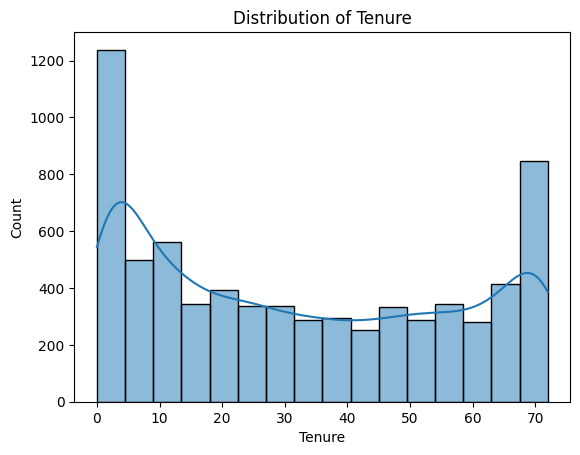

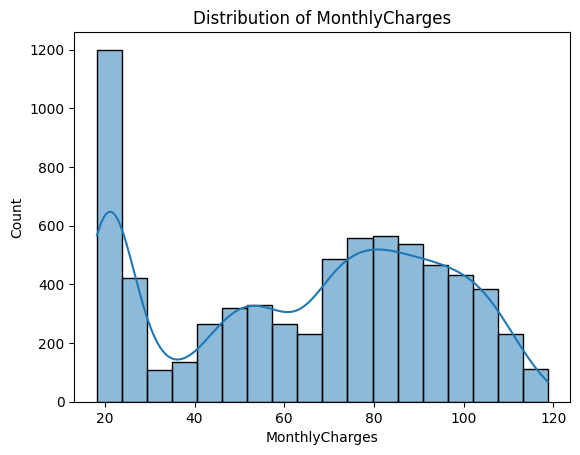

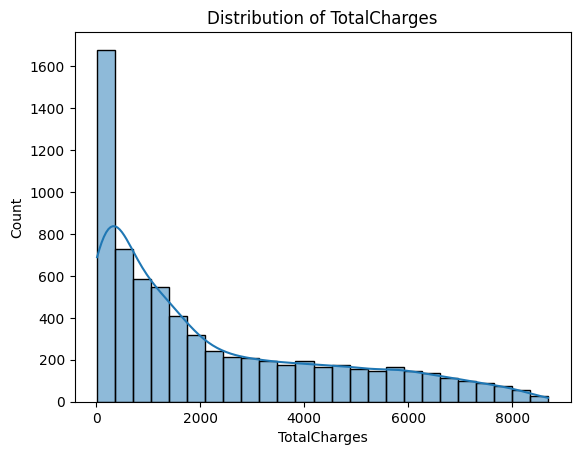

In [90]:
numerical_columns = ['Tenure', 'MonthlyCharges', 'TotalCharges']
for column in numerical_columns:
    sns.histplot(data_telco[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

In [91]:
data_telco[numerical_columns].describe()

,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [92]:
#Observations

#Tenure
# the average customer has been with the company for around 32 months -> more than 2.7 years
# standard deviation is suggesting a wide spread in customer tenure, 2 years
# min = 0, max = 72 months = 6 years -> there are some new customers, while the longest tenure is 6 years

#MonthlyCharges 
# monthly average customer pays 64$ for serivces
# min = $18.25, max = $118.75 - showing a broad range of monthly charges, possibly reflecting different service plans or customer usage

#TotalCharges 
# the average total charges a customer has accumulated = $2 281.92
# std -> a large spread in total charges
# from $18.80 to $8 684.80, reflecting the variation from new customers to those who have been with the company for a long time


# Half of the customers have a tenure of 29 months (2.4 years) or less, pay $70.35 or less monthly
# and have total charges of $1,397.48 or less

#### EDA for categorical

In [94]:
categorical_columns_df = data_telco.drop(numerical_columns, axis =1)
categorical_columns_df

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


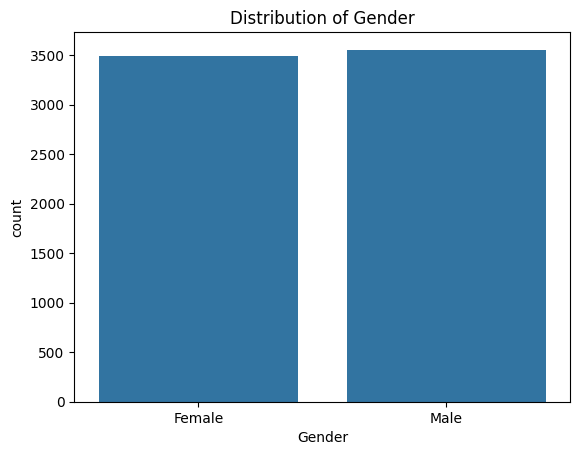

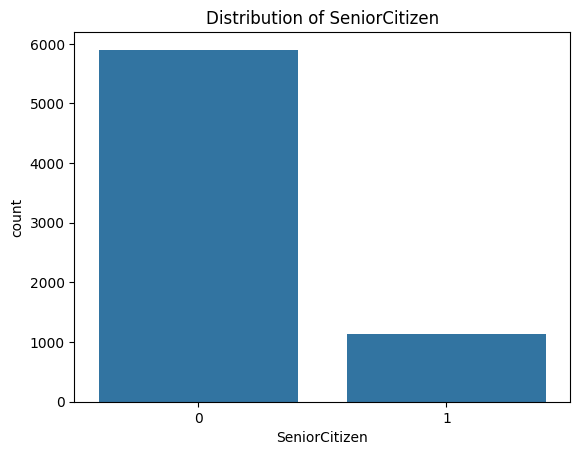

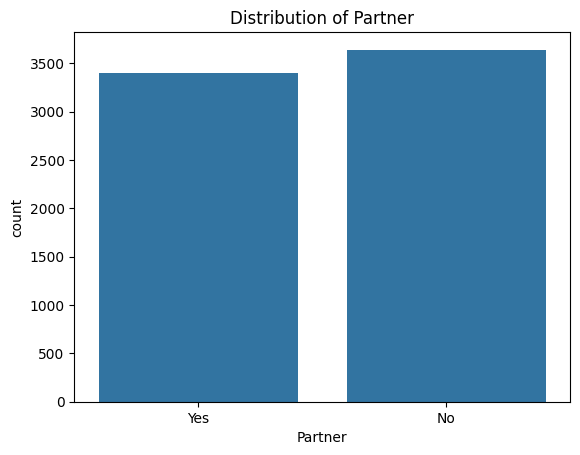

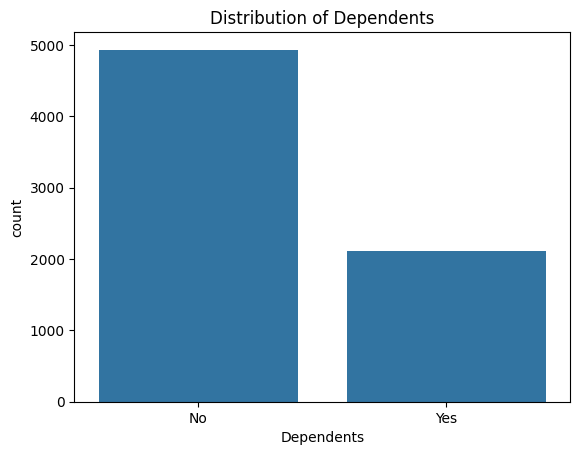

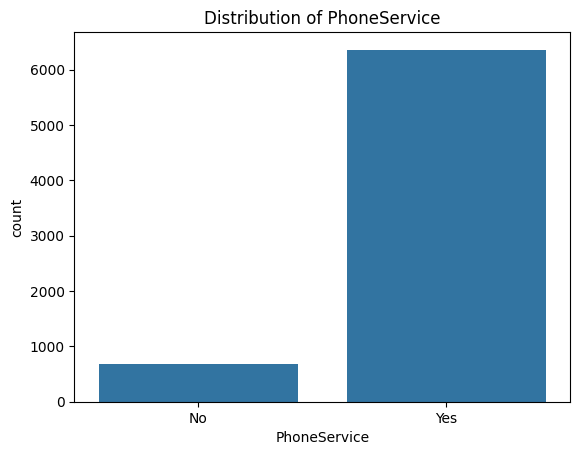

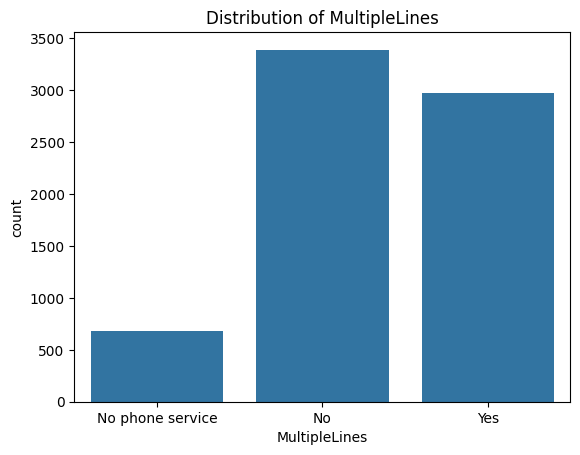

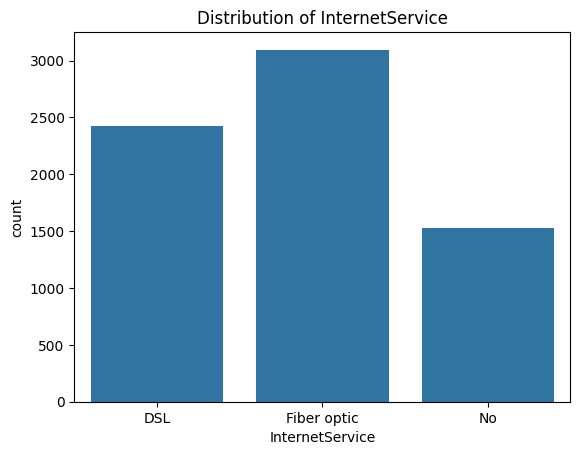

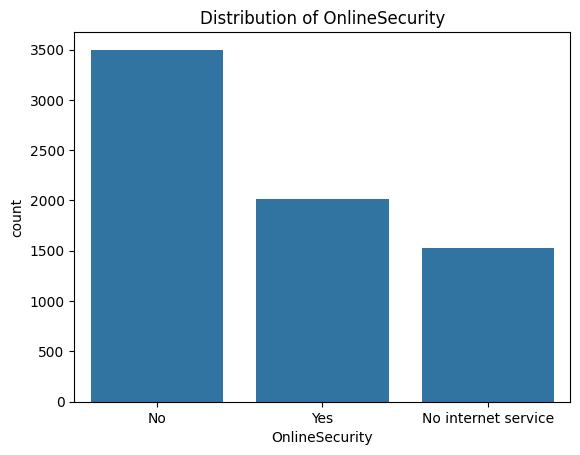

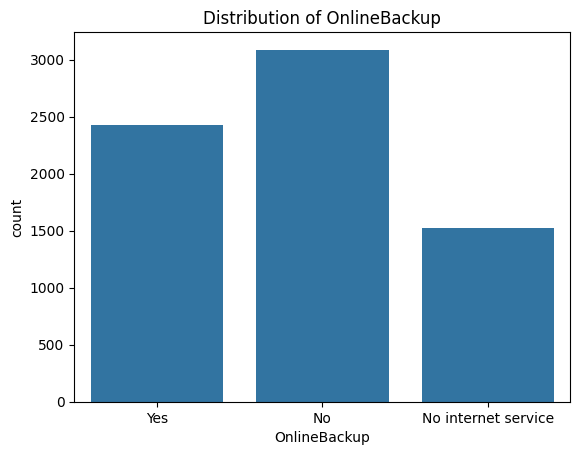

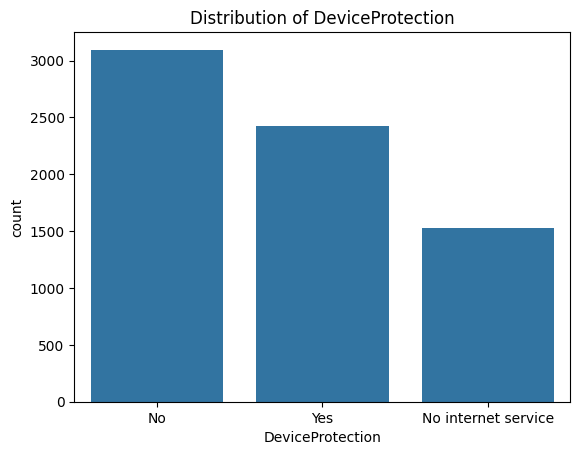

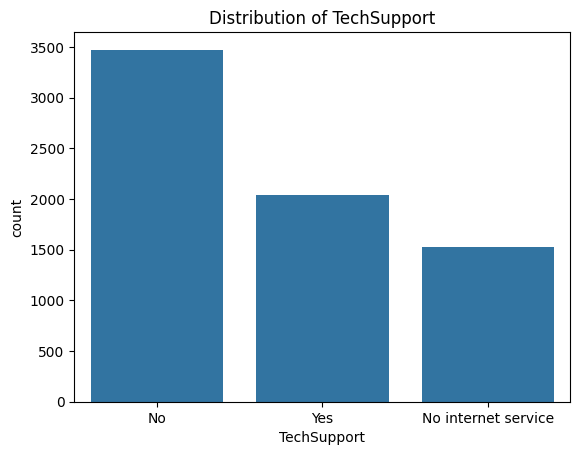

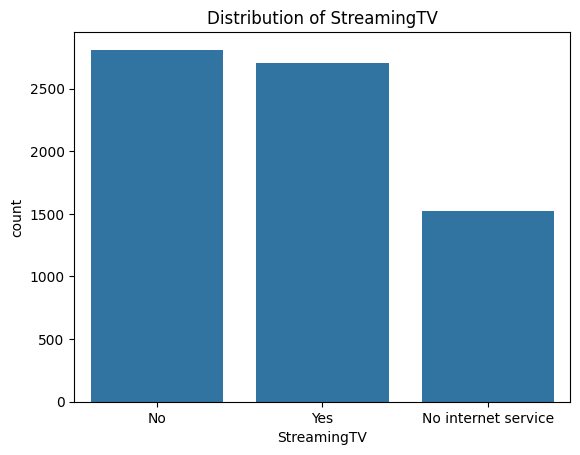

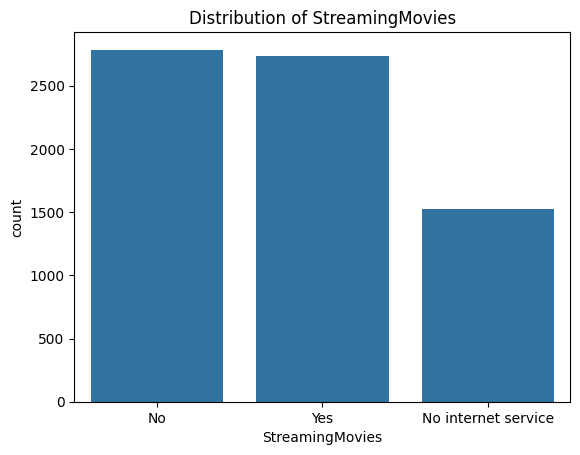

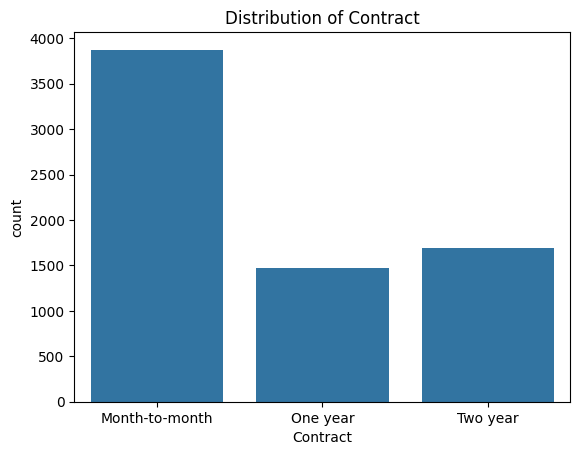

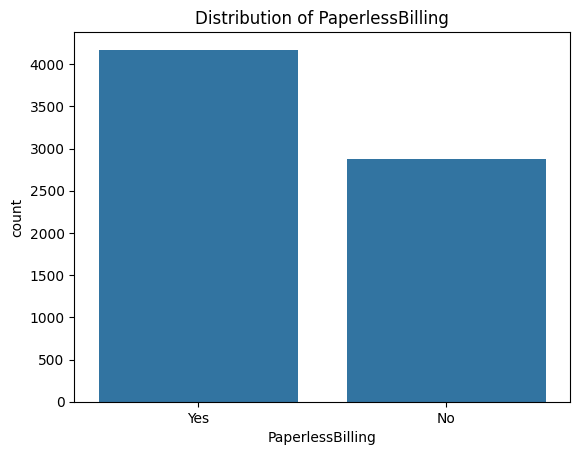

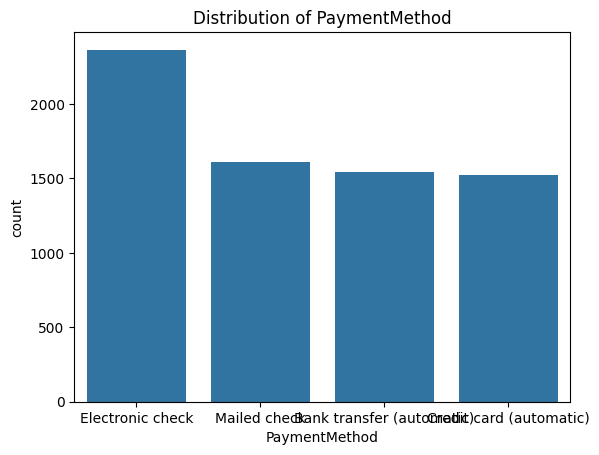

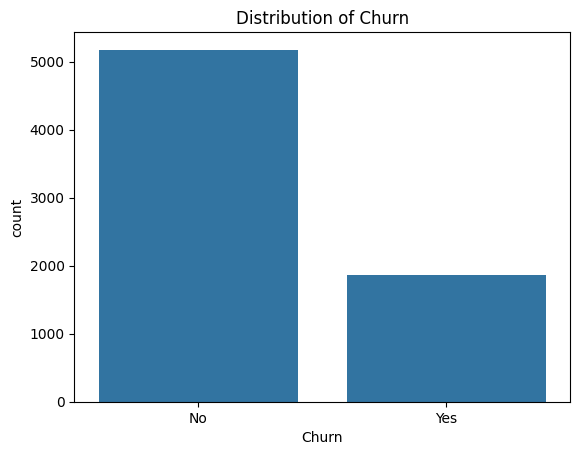

In [95]:
for column in categorical_columns_df:
    sns.countplot(data=data_telco, x=column)
    plt.title(f'Distribution of {column}')
    plt.show()

In [96]:
for feature in categorical_columns_df:
    print()
    print(feature)
    print(round(categorical_columns_df[feature].value_counts() / categorical_columns_df.shape[0],2))
    print()
    print('---------')


Gender
Gender
Male      0.5
Female    0.5
Name: count, dtype: float64

---------

SeniorCitizen
SeniorCitizen
0    0.84
1    0.16
Name: count, dtype: float64

---------

Partner
Partner
No     0.52
Yes    0.48
Name: count, dtype: float64

---------

Dependents
Dependents
No     0.7
Yes    0.3
Name: count, dtype: float64

---------

PhoneService
PhoneService
Yes    0.9
No     0.1
Name: count, dtype: float64

---------

MultipleLines
MultipleLines
No                  0.48
Yes                 0.42
No phone service    0.10
Name: count, dtype: float64

---------

InternetService
InternetService
Fiber optic    0.44
DSL            0.34
No             0.22
Name: count, dtype: float64

---------

OnlineSecurity
OnlineSecurity
No                     0.50
Yes                    0.29
No internet service    0.22
Name: count, dtype: float64

---------

OnlineBackup
OnlineBackup
No                     0.44
Yes                    0.34
No internet service    0.22
Name: count, dtype: float64

---------

In [97]:
#Observations

# The distribution of genders is almost equal, which suggests no gender bias in the data
# A significant majority of the customers are not senior citizens
# The distribution between customers with and without partners is fairly balanced
# Most customers do not have dependents
# The majority of customers have phone service
# Most customers either have multiple lines or only one line
# A higher percentage of customers use fiber optic, followed by DSL, and a significant portion do not have internet service
# Nearly half of the customers do not have online security, online backup, device protection, technical support, 
# Streaming TV and Streaming Movies have almost the same distribution. When we combine answers No internet service and No, we will see that most of the customers does not have streaming service in their abbonament 
# Most customers prefer month-to-month contracts, indicating potential flexibility or uncertainty about long-term commitment
# A majority of customers opt for paperless billing, reflecting a trend towards digital convenience
# The electronic check is the most common payment method, followed by mailed checks. Automatic payments are also fairly common but slightly less preferred
# The churn rate, as it was mentioned before, is about 26.5%, which suggests a significant but not overwhelming proportion of customers are leaving

### **f) remove churn variable**

We want to analyze groups based on other features, after we finish, we will bring back to churn to combine it with clusters, to see how churn rates vary across different clusters

In [100]:
# Ultimately, we have 7043 rows and 24 columns without churn feature, only numerical standardized data without missing values and with correct data types 
# -> The data are well prepared for further analysis
data_updated = data_after_corr.drop(['Churn'],axis =1)
data_updated

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,-0.854176,-0.633933,1.378241,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807
1,-0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.854176,1.577454,-0.725563,1.381277,-0.639439,-0.790132,-0.796070,-1.205113,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,-0.711026,1.835513
2,-0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,1.577454,1.378241,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513
3,-0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,-0.854176,1.577454,-0.725563,1.381277,1.563872,-0.790132,-0.796070,-1.205113,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,1.887201,-0.525047,-0.711026,-0.544807
4,1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,-0.723740,1.129102,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.170719,1.577454,-0.725563,1.381277,1.563872,1.265612,1.256171,0.829798,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,-0.711026,1.835513
7039,1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.170719,-0.633933,1.378241,1.381277,-0.639439,1.265612,1.256171,0.829798,-0.723740,1.129102,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,1.904590,-0.711026,-0.544807
7040,1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,-0.854176,1.577454,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807
7041,-0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.170719,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,-0.723740,1.129102,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513


## **4. Dimensionality reduction - PCA** <a id="chapter4"></a>

### a) choosing the number of components

In [103]:
pca = PCA(n_components= data_updated.shape[1])
pca.fit(data_updated)
pca_evr = pca.explained_variance_ratio_.round(2)
pca_evr

array([0.17, 0.14, 0.09, 0.06, 0.05, 0.05, 0.05, 0.04, 0.04, 0.04, 0.04,
       0.03, 0.03, 0.03, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02, 0.01, 0.  ,
       0.  , 0.  ])

In [104]:
np.cumsum(pca_evr)

array([0.17, 0.31, 0.4 , 0.46, 0.51, 0.56, 0.61, 0.65, 0.69, 0.73, 0.77,
       0.8 , 0.83, 0.86, 0.89, 0.92, 0.94, 0.96, 0.98, 1.  , 1.01, 1.01,
       1.01, 1.01])

In [105]:
cum_pca_evr = list(zip(range(1,25),np.cumsum(pca_evr).round(2)))
cum_pca_evr

[(1, 0.17),
 (2, 0.31),
 (3, 0.4),
 (4, 0.46),
 (5, 0.51),
 (6, 0.56),
 (7, 0.61),
 (8, 0.65),
 (9, 0.69),
 (10, 0.73),
 (11, 0.77),
 (12, 0.8),
 (13, 0.83),
 (14, 0.86),
 (15, 0.89),
 (16, 0.92),
 (17, 0.94),
 (18, 0.96),
 (19, 0.98),
 (20, 1.0),
 (21, 1.01),
 (22, 1.01),
 (23, 1.01),
 (24, 1.01)]

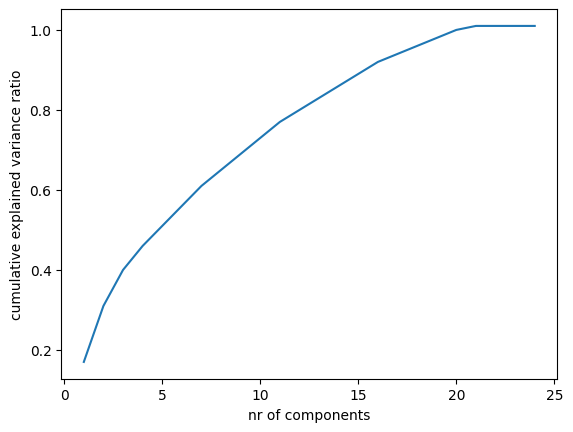

In [106]:
pd.DataFrame(cum_pca_evr).set_index(0).plot(xlabel = 'nr of components', ylabel ='cumulative explained variance ratio', legend=False);

In [107]:
# We want to capture +80% of the explained variance with the model
# Reducing 24 columns to 15 we are able to capture around 90% of the variance 
# It means that the majority of the information in our data is retained with the reduced feature set

### b) fit the model with n_components = 15

In [109]:
pca_15 = PCA(n_components= 15)
pca_15.fit(data_updated)
pca_15_evr = pca_15.explained_variance_ratio_
sum(pca_15_evr).round(2)

0.89

In [110]:
pca_15.components_

array([[ 7.59989260e-03,  4.79489203e-02,  1.87779241e-01,
         6.41414125e-02,  3.55370729e-01, -2.68708173e-02,
         2.13041396e-01,  2.56103249e-01,  2.83625133e-01,
         3.15796183e-01,  2.84043633e-01,  3.00115137e-01,
         3.02492303e-01,  1.01658298e-01,  9.09056447e-02,
         1.25983840e-01, -2.56585127e-01, -2.44067328e-01,
         1.00476472e-01,  1.88435559e-01,  1.17299349e-01,
         1.22285721e-01, -2.47460523e-02, -2.07500378e-01],
       [ 7.93630695e-03,  2.12929952e-01, -1.39419180e-01,
        -2.22361698e-01, -1.86401592e-01,  7.59171028e-02,
         1.41898596e-01, -8.93063302e-02,  4.25225048e-02,
         4.01004632e-02, -7.96057291e-02,  1.66698222e-01,
         1.64924386e-01,  2.60088300e-01, -1.60517965e-01,
         3.99041511e-01, -2.95696759e-01,  3.52783325e-01,
        -1.22273796e-01, -2.94213090e-01, -9.92303536e-02,
        -1.15189148e-01,  3.56433927e-01, -1.90112352e-01],
       [-3.26777865e-03, -5.27427466e-02, -1.67255491e

In [111]:
pd.DataFrame(pca_15.components_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.007600,0.047949,0.187779,0.064141,0.355371,-0.026871,0.213041,0.256103,0.283625,0.315796,0.284044,0.300115,0.302492,0.101658,0.090906,0.125984,-0.256585,-0.244067,0.100476,0.188436,0.117299,0.122286,-0.024746,-0.207500
1,0.007936,0.212930,-0.139419,-0.222362,-0.186402,0.075917,0.141899,-0.089306,0.042523,0.040100,-0.079606,0.166698,0.164924,0.260088,-0.160518,0.399042,-0.295697,0.352783,-0.122274,-0.294213,-0.099230,-0.115189,0.356434,-0.190112
2,-0.003268,-0.052743,-0.167255,-0.094209,-0.192718,-0.434878,-0.279067,0.195841,0.087558,0.078525,0.192499,0.013332,0.021345,0.009241,0.562174,-0.278379,-0.312734,0.164508,-0.016630,-0.175621,-0.086922,-0.042069,0.051257,0.069194
3,-0.030848,0.008131,-0.137688,-0.130879,-0.021251,0.060336,-0.051365,-0.025068,0.005382,0.031487,-0.027605,0.030635,0.037331,-0.013612,-0.058959,0.034243,0.026718,-0.275793,0.806724,-0.446545,-0.106318,0.059978,-0.018009,0.066185
4,-0.034168,0.007969,-0.076735,-0.057176,0.006437,0.022795,0.019825,0.001922,-0.010030,0.022863,0.010644,-0.007764,-0.000732,0.006356,-0.021374,0.002846,0.021214,0.007842,-0.111846,0.097281,-0.684248,0.704661,-0.006796,-0.008878
5,-0.061220,-0.140394,0.533912,0.624270,-0.069144,-0.073146,-0.073002,-0.041750,-0.026409,-0.023606,-0.078442,0.068826,0.035149,0.027325,0.021277,0.006540,-0.032409,0.033405,0.099325,-0.133368,-0.303193,-0.140425,0.356706,0.035166
6,-0.000598,-0.260859,-0.160418,-0.037148,-0.081337,0.273117,0.099669,0.128463,0.066086,0.147196,0.229781,0.166654,0.155297,-0.098532,-0.090014,0.107354,-0.025562,0.004205,-0.089346,0.080107,-0.275886,-0.321114,-0.067386,0.662038
7,0.716601,-0.201854,0.081725,0.192521,-0.129976,0.214220,0.075032,0.187249,0.118100,-0.079823,0.059234,-0.123207,-0.137447,0.091224,0.018832,0.094361,-0.135394,0.182300,0.016215,-0.227572,0.112582,0.197134,-0.260300,-0.011387
8,0.690471,0.151167,-0.056866,-0.165875,0.107265,-0.215876,-0.109207,-0.163422,-0.121030,0.054906,-0.056959,0.131236,0.147788,-0.087474,-0.031182,-0.104620,0.161991,-0.210459,0.023931,0.222147,-0.182283,-0.182504,0.326052,-0.008220
9,0.035461,0.768041,0.265907,-0.027493,0.070796,-0.037431,0.131501,0.141535,0.219375,-0.043534,-0.090455,-0.179552,-0.156692,-0.002292,0.058503,-0.022112,-0.040806,0.032042,0.011687,-0.048406,-0.117518,-0.079720,-0.145961,0.357914


In [112]:
pca_components_df = pd.DataFrame(pca_15.components_.round(2), columns = data_updated.columns, index = range(1,16))
pca_components_df.index.name ='PC'
pca_components_df

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
PC,,,,,,,,,,,,,,,,,,,,,,,,
1,0.01,0.05,0.19,0.06,0.36,-0.03,0.21,0.26,0.28,0.32,0.28,0.30,0.30,0.10,0.09,0.13,-0.26,-0.24,0.10,0.19,0.12,0.12,-0.02,-0.21
2,0.01,0.21,-0.14,-0.22,-0.19,0.08,0.14,-0.09,0.04,0.04,-0.08,0.17,0.16,0.26,-0.16,0.40,-0.30,0.35,-0.12,-0.29,-0.10,-0.12,0.36,-0.19
3,-0.00,-0.05,-0.17,-0.09,-0.19,-0.43,-0.28,0.20,0.09,0.08,0.19,0.01,0.02,0.01,0.56,-0.28,-0.31,0.16,-0.02,-0.18,-0.09,-0.04,0.05,0.07
4,-0.03,0.01,-0.14,-0.13,-0.02,0.06,-0.05,-0.03,0.01,0.03,-0.03,0.03,0.04,-0.01,-0.06,0.03,0.03,-0.28,0.81,-0.45,-0.11,0.06,-0.02,0.07
5,-0.03,0.01,-0.08,-0.06,0.01,0.02,0.02,0.00,-0.01,0.02,0.01,-0.01,-0.00,0.01,-0.02,0.00,0.02,0.01,-0.11,0.10,-0.68,0.70,-0.01,-0.01
6,-0.06,-0.14,0.53,0.62,-0.07,-0.07,-0.07,-0.04,-0.03,-0.02,-0.08,0.07,0.04,0.03,0.02,0.01,-0.03,0.03,0.10,-0.13,-0.30,-0.14,0.36,0.04
7,-0.00,-0.26,-0.16,-0.04,-0.08,0.27,0.10,0.13,0.07,0.15,0.23,0.17,0.16,-0.10,-0.09,0.11,-0.03,0.00,-0.09,0.08,-0.28,-0.32,-0.07,0.66
8,0.72,-0.20,0.08,0.19,-0.13,0.21,0.08,0.19,0.12,-0.08,0.06,-0.12,-0.14,0.09,0.02,0.09,-0.14,0.18,0.02,-0.23,0.11,0.20,-0.26,-0.01
9,0.69,0.15,-0.06,-0.17,0.11,-0.22,-0.11,-0.16,-0.12,0.05,-0.06,0.13,0.15,-0.09,-0.03,-0.10,0.16,-0.21,0.02,0.22,-0.18,-0.18,0.33,-0.01


In [113]:
def highlight_values(val):
    color = '#e03131' if val > 0.2 else '#228be6' if val < -0.2 else ''
    return f'background-color: {color}'

In [114]:
#pca_components_df.style.map(highlight_values)

### c) PC interpretation 

In [116]:
pca_components_df_1_2_3 = pca_components_df.loc[1:3]

styled_df_pca_components_df = pca_components_df_1_2_3.style.map(highlight_values)
styled_df_pca_components_df

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
PC,,,,,,,,,,,,,,,,,,,,,,,,
1,0.010000,0.050000,0.190000,0.060000,0.360000,-0.030000,0.210000,0.260000,0.280000,0.320000,0.280000,0.300000,0.300000,0.100000,0.090000,0.130000,-0.260000,-0.240000,0.100000,0.190000,0.120000,0.120000,-0.020000,-0.210000
2,0.010000,0.210000,-0.140000,-0.220000,-0.190000,0.080000,0.140000,-0.090000,0.040000,0.040000,-0.080000,0.170000,0.160000,0.260000,-0.160000,0.400000,-0.300000,0.350000,-0.120000,-0.290000,-0.100000,-0.120000,0.360000,-0.190000
3,-0.000000,-0.050000,-0.170000,-0.090000,-0.190000,-0.430000,-0.280000,0.200000,0.090000,0.080000,0.190000,0.010000,0.020000,0.010000,0.560000,-0.280000,-0.310000,0.160000,-0.020000,-0.180000,-0.090000,-0.040000,0.050000,0.070000


In [117]:
# + features with high positive loadings 
# - features with high negative loadings
# positive/negative shows only direction in which we are moving on the axis 

# Component 1: 
# + tenure &  multiple lines, higher engagement with additional services (like security and backup, streaming) -> loyal, eager clients
# - no internet, contract month to month & mailed check ->lower commitment, non-tech-savvy, flexible 


# Component 2: 
# + fiber optic,month to month contract,electronic check & senior, paperless billing -> client prefers modern technology (fiber optic), flexibility (month to month) and digital convenience
# - no internet service,two years contract & have dependents -> a lack of commitment, prefer stable situation

# Component 3: 
# + DSL & online security, tech support, contract 2 years, tenure, have partner -> clients who value secure, stable, and long-term relationships
# - phone service & multiple lines, fiber optic, no internet service -> more than internet client care about phones

### d) transform data
Transfer the original observations into the new dimensional space. Every row is a row in our data_updated dataset, however now instead of each row being represented by 24 dimensions, it is represented by just 15 dimensions. 

In [119]:
pca_15.transform(data_updated)

array([[-1.26784862,  0.73623743,  3.06438692, ...,  1.68394053,
         0.63643016, -0.26774473],
       [-0.54838577, -1.94324979,  1.75611883, ..., -0.61738121,
        -0.49965347, -1.62290189],
       [-1.61039094, -0.15626541,  2.41651065, ...,  0.70746279,
        -0.26698252, -0.78579617],
       ...,
       [-1.0134655 , -0.1120394 ,  3.02912601, ..., -0.36526496,
        -0.81798119, -1.53114758],
       [-1.74480384,  1.66454776, -1.00384577, ..., -0.90089661,
         0.10788595, -0.0408551 ],
       [ 3.01874281, -0.18409896, -0.47008205, ..., -0.68283485,
        -2.41617565, -0.27640943]])

In [120]:
pca_15.transform(data_updated).shape

(7043, 15)

In [121]:
column_names_pca = [f'PC{i}' for i in range(1,16)]
column_names_pca

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15']

In [122]:
pca_data_transformed = pd.DataFrame(pca_15.transform(data_updated), columns = column_names_pca)
pca_data_transformed

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-1.267849,0.736237,3.064387,-0.827082,-0.246671,1.327497,-1.765788,0.340266,1.227473,0.345180,0.157598,1.269342,1.683941,0.636430,-0.267745
1,-0.548386,-1.943250,1.756119,2.446509,-0.176010,-0.595344,1.516506,-0.697399,-0.666808,0.600524,0.927121,-0.656598,-0.617381,-0.499653,-1.622902
2,-1.610391,-0.156265,2.416511,-0.146448,0.050076,-0.632577,1.479277,0.400686,-1.836693,1.092452,0.541348,1.341737,0.707463,-0.266983,-0.785796
3,1.104932,-2.246170,3.189648,1.757621,-1.859509,-1.368357,-1.179881,-1.050258,-0.435311,-0.576496,0.520804,-0.929149,-0.323413,-1.022800,-0.739782
4,-2.254277,2.316833,-0.007978,-0.166585,0.056066,0.032837,-0.257767,0.797810,0.725154,-0.939874,0.552762,0.630854,0.206368,-0.994414,0.018413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2.324539,-1.309426,1.243300,1.840975,-0.397939,1.812629,2.316411,-0.127933,-1.137944,0.415424,-0.832160,0.346638,-2.449432,0.461350,-0.287375
7039,3.292308,0.119054,-1.824342,2.046630,1.281439,1.308122,-0.445332,1.411687,0.115996,-0.240807,-1.434137,0.101624,0.984512,1.145490,-0.609368
7040,-1.013466,-0.112039,3.029126,-1.188206,-0.343515,2.625379,-1.734955,0.873241,0.802275,0.165459,0.402384,0.743807,-0.365265,-0.817981,-1.531148
7041,-1.744804,1.664548,-1.003846,-0.268426,0.026393,0.017770,0.628421,-0.354147,-1.281881,3.038131,-0.911461,0.289081,-0.900897,0.107886,-0.040855


## **5. Save ready datasets as its own files** <a id="chapter5"></a>
Pickle the dataframes for modeling

In [124]:
# dataset labels: 
# data_raw - original data
# data_telco - drop ID, changed column names, total charges (removed NaNs + type changed to numerical)
# data_encoded - label encoding
# data_encoded_all - label encoding + one-hot encoding
# data_standardized - standardization
# data_after_corr - removed monthly and total charges
# data_updated - without churn feature
# pca_data_transformed - data_updated + pca reduction 

### a) original dataset cleaned

In [126]:
data_telco

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [127]:
#data_telco.to_pickle('Telco_Customer_Churn_original_ds_cleaned.pkl')

### b) final dataset 

In [129]:
data_updated

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,-0.854176,-0.633933,1.378241,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807
1,-0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.854176,1.577454,-0.725563,1.381277,-0.639439,-0.790132,-0.796070,-1.205113,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,-0.711026,1.835513
2,-0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,1.577454,1.378241,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513
3,-0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,-0.854176,1.577454,-0.725563,1.381277,1.563872,-0.790132,-0.796070,-1.205113,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,1.887201,-0.525047,-0.711026,-0.544807
4,1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,-0.723740,1.129102,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.170719,1.577454,-0.725563,1.381277,1.563872,1.265612,1.256171,0.829798,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,-0.711026,1.835513
7039,1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.170719,-0.633933,1.378241,1.381277,-0.639439,1.265612,1.256171,0.829798,-0.723740,1.129102,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,1.904590,-0.711026,-0.544807
7040,1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,-0.854176,1.577454,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807
7041,-0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.170719,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,0.829798,-0.723740,1.129102,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513


In [130]:
#data_updated.to_pickle('Telco_Customer_Churn_ds_prepared.pkl')

### c) pca 15 data set 

In [132]:
pca_data_transformed

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-1.267849,0.736237,3.064387,-0.827082,-0.246671,1.327497,-1.765788,0.340266,1.227473,0.345180,0.157598,1.269342,1.683941,0.636430,-0.267745
1,-0.548386,-1.943250,1.756119,2.446509,-0.176010,-0.595344,1.516506,-0.697399,-0.666808,0.600524,0.927121,-0.656598,-0.617381,-0.499653,-1.622902
2,-1.610391,-0.156265,2.416511,-0.146448,0.050076,-0.632577,1.479277,0.400686,-1.836693,1.092452,0.541348,1.341737,0.707463,-0.266983,-0.785796
3,1.104932,-2.246170,3.189648,1.757621,-1.859509,-1.368357,-1.179881,-1.050258,-0.435311,-0.576496,0.520804,-0.929149,-0.323413,-1.022800,-0.739782
4,-2.254277,2.316833,-0.007978,-0.166585,0.056066,0.032837,-0.257767,0.797810,0.725154,-0.939874,0.552762,0.630854,0.206368,-0.994414,0.018413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2.324539,-1.309426,1.243300,1.840975,-0.397939,1.812629,2.316411,-0.127933,-1.137944,0.415424,-0.832160,0.346638,-2.449432,0.461350,-0.287375
7039,3.292308,0.119054,-1.824342,2.046630,1.281439,1.308122,-0.445332,1.411687,0.115996,-0.240807,-1.434137,0.101624,0.984512,1.145490,-0.609368
7040,-1.013466,-0.112039,3.029126,-1.188206,-0.343515,2.625379,-1.734955,0.873241,0.802275,0.165459,0.402384,0.743807,-0.365265,-0.817981,-1.531148
7041,-1.744804,1.664548,-1.003846,-0.268426,0.026393,0.017770,0.628421,-0.354147,-1.281881,3.038131,-0.911461,0.289081,-0.900897,0.107886,-0.040855


In [133]:
#pca_data_transformed.to_pickle('Telco_Customer_Churn_ds_pca_15_transformed.pkl')